## 1.并行环境，目前实例是1  Parallel environment, current instance is 1  

In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from stable_baselines3 import PPO
import torch
from gym.wrappers import GrayScaleObservation

In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,keep_dim=True)

In [3]:
from stable_baselines3.common.vec_env import DummyVecEnv

In [4]:

env = DummyVecEnv([lambda: env])
#eval_env = DummyVecEnv([lambda: gym.make(env_id, render_mode="rgb_array")])

In [5]:
state = env.reset()
print(state.shape)

(1, 240, 256, 1)


## 2.叠帧  overlapping frames

In [6]:
from stable_baselines3.common.vec_env import VecFrameStack


In [7]:
env = VecFrameStack(env,4,channels_order='last') 
##这就是叠帧的关键代码，有三个参数，分别是环境的名字，要叠帧的帧数和将这些帧叠在最前面还是最后面

In [8]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)


In [9]:
print(state.shape)
print(state[0].shape)

(1, 240, 256, 4)
(240, 256, 4)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


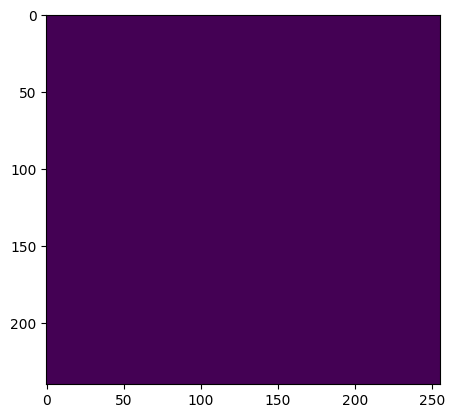

In [10]:
plt.imshow(state[0][:,:,0])
print(state[0][:,:,0])

[[140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 [140 140 140 ... 140 140 140]
 ...
 [214 124 124 ... 124 124   0]
 [214 124 124 ... 124   0   0]
 [124   0   0 ...   0   0 124]]


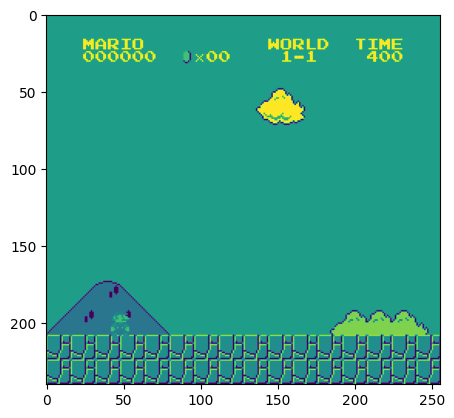

In [11]:
plt.imshow(state[0][:,:,3])
print(state[0][:,:,3])

In [12]:
def show_img_4(state):
    plt.figure(figsize=(20,16))
    for idx in range(state.shape[3]):
        plt.subplot(1,4,idx+1)
        plt.imshow(state[0][:,:,idx])
    plt.show()
    
#a原始代码如下：    
#plt.figure(figsize=(20,16))
#for idx in range(state.shape[3]):
   # plt.subplot(1,4,idx+1)
    #plt.imshow(state[0][:,:,idx])
#plt.show()

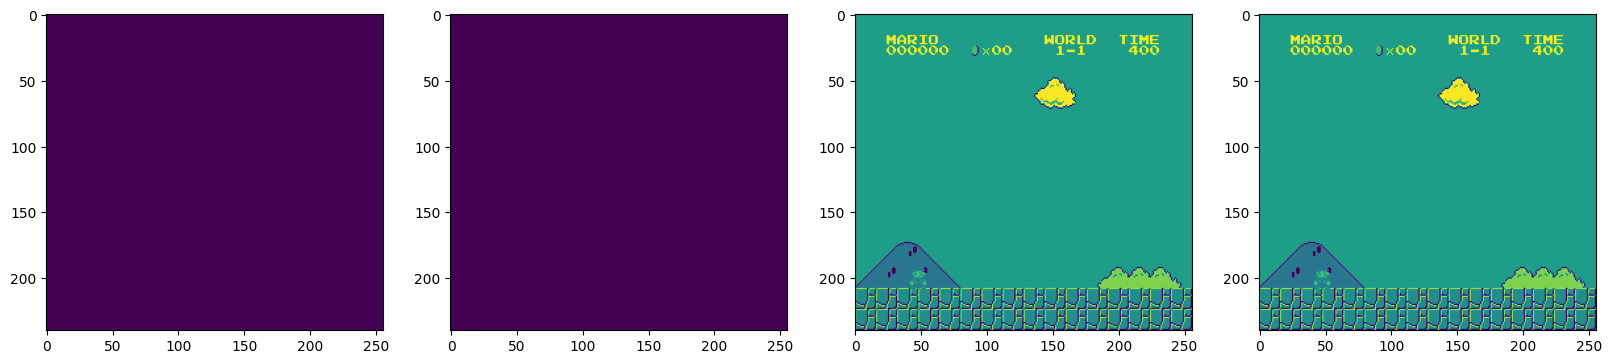

In [13]:
state, reward, done, info = env.step([env.action_space.sample()]) #注意[env.action_space.sample()]是列表
show_img_4(state)

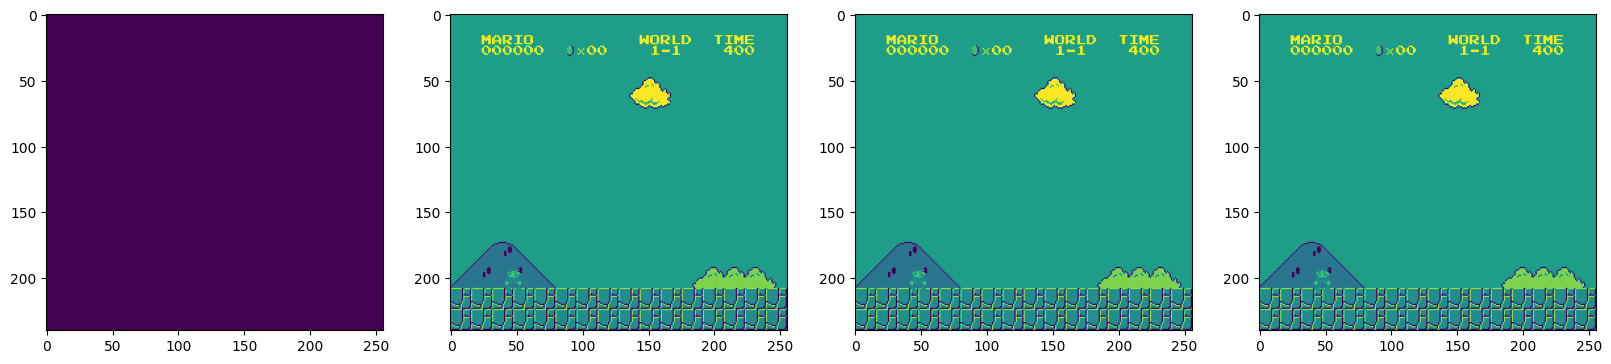

In [14]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

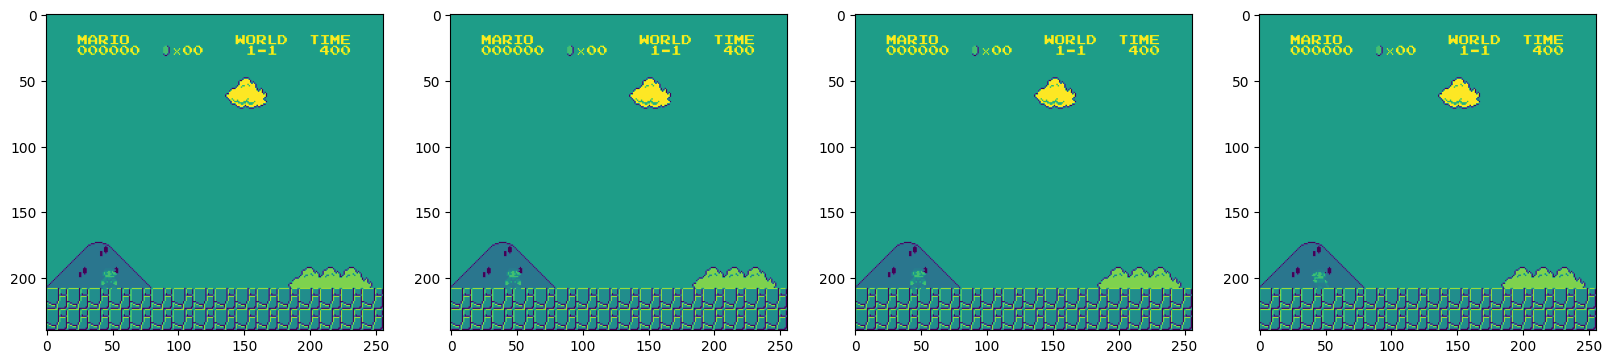

In [15]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

- 由上图可知，当要求将这些帧叠在最后面，它是从后往前显现的
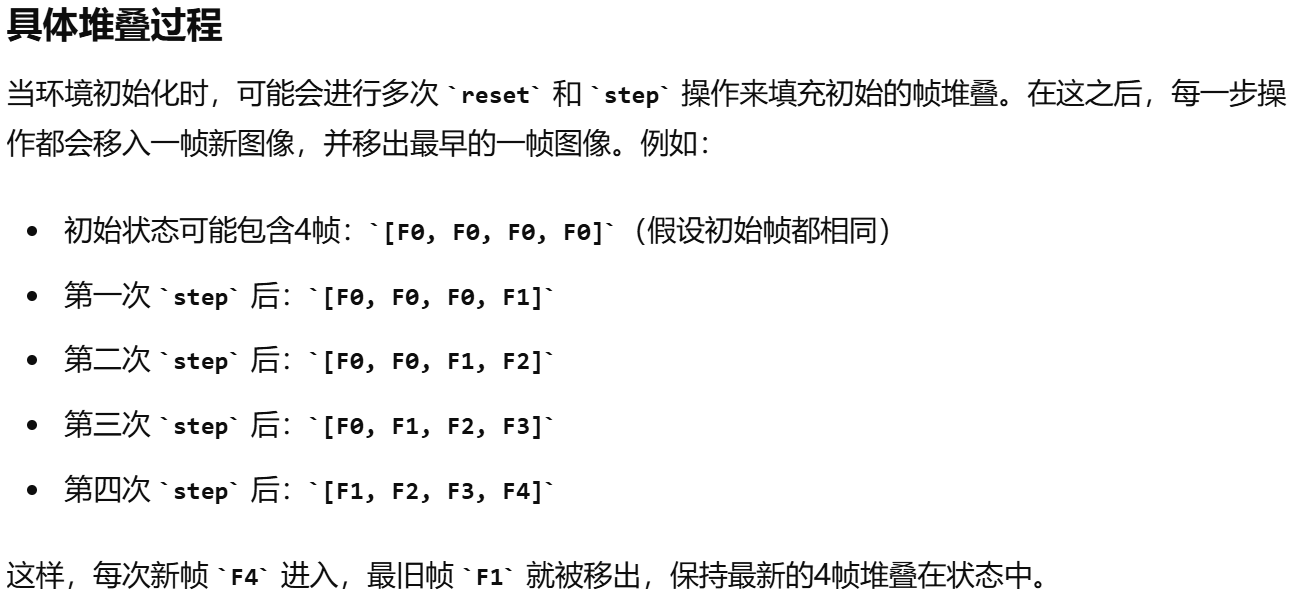

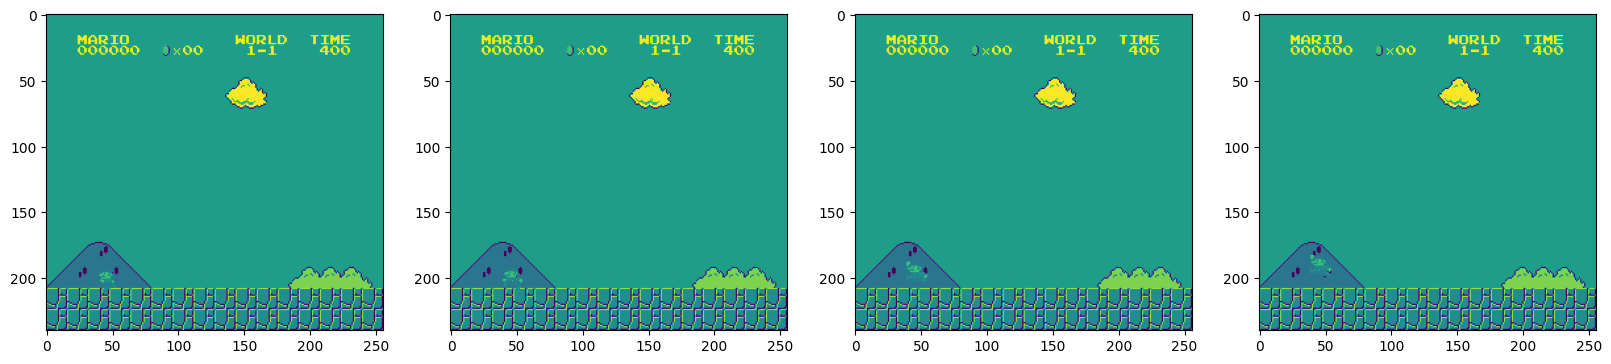

In [18]:
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

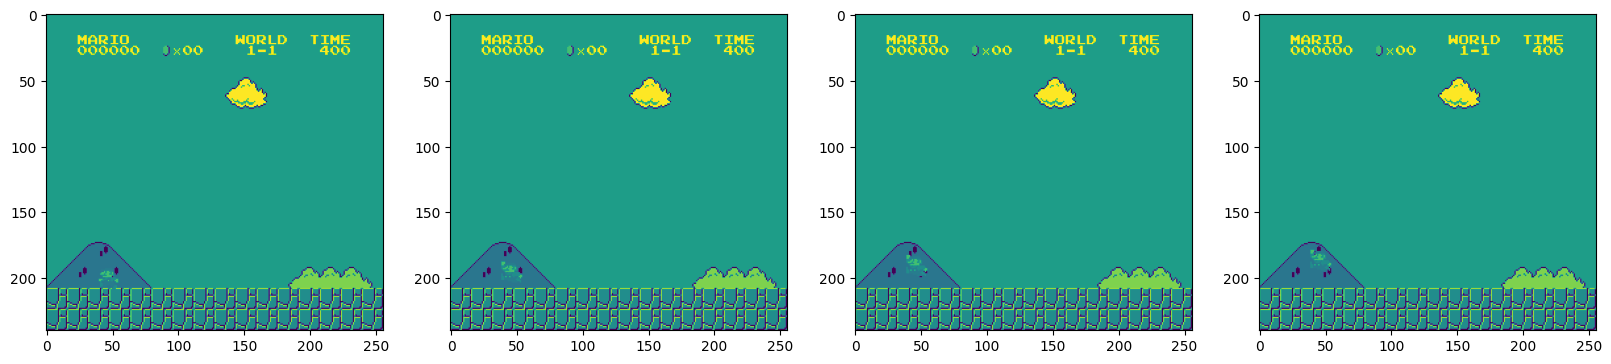

In [19]:
env = VecFrameStack(env,4,channels_order='last') 
state, reward, done, info = env.step([env.action_space.sample()])
show_img_4(state)

## 3.Monitor

Monitor 是一个用于记录强化学习环境运行过程的工具，它可以帮助你跟踪和记录每一步的奖励、时间、完成情况等信息。
Monitor 类通常用于记录训练期间的各种统计信息，以便后续分析和调试。

Monitor 的主要作用是：
- 记录训练数据：Monitor 会将每一回合的奖励、持续时间等信息记录下来，保存到指定的目录中。
- 便于分析和调试：通过记录的数据，你可以分析训练过程中的表现，比如每一回合的奖励变化趋势、训练的稳定性等。
- 提供回合完成标志：Monitor 会添加一个标志来指示一个回合是否完成，这在分析数据时非常有用。

Monitor 的参数
Monitor 通常有以下几个参数：
- env：要监控的环境实例。
- monitor_dir：保存监控数据的目录。如果不提供目录，数据不会被保存到文件中。
- allow_early_resets（可选）：是否允许在回合结束前重置环境。默认值是 True。
- reset_keywords（可选）：要记录的环境重置时的关键字参数。
- info_keywords（可选）：要记录的环境信息字典中的关键字。

In [ ]:
from stable_baselines3.common.monitor import Monitor

In [ ]:
monitor_dir = r'./monitor_log/'
env = Monitor(env,monitor_dir)

## 整理引入

In [20]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import time
from matplotlib import pyplot as plt
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env import VecFrameStack
import os

In [21]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

monitor_dir = r'./monitor_log/'
os.makedirs(monitor_dir,exist_ok=True)
env = Monitor(env,monitor_dir)

env = GrayScaleObservation(env,keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env,4,channels_order='last')

In [22]:
state = env.reset()
print(state.shape)

(1, 240, 256, 4)
